In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# AdaBoost Package

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### 伪造高斯分布数据

In [20]:
from sklearn.datasets import make_gaussian_quantiles

### 中文防止乱码

In [21]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 创建数据

In [22]:
X1,y1 = make_gaussian_quantiles(cov=2.,
                                n_samples=200,n_features=2,
                                n_classes=2,random_state=1)
#指定均值
X2,y2 = make_gaussian_quantiles(mean=(3,3),cov=1.5,
                                n_samples=300,n_features=2,
                                n_classes=2,random_state=1)

In [23]:
y1

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0])

In [24]:
# 按行进行拼接
X = np.concatenate((X1,X2))
y = np.concatenate((y1,-y2+1))

# 模型训练

In [25]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm = 'SAMME.R',
                         n_estimators = 200,learning_rate = 1.0)
bdt.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

# 可视化

In [26]:
plot_step = 0.2
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
#绘制网格
xx,yy = np.meshgrid(np.arange(x1_min,x1_max,plot_step),
                   np.arange(x2_min,x2_max,plot_step))


In [27]:
#获得网格预测值
Z = bdt.predict(np.c_[xx.ravel(),yy.ravel()]) 
#设置维度
Z = Z.reshape(xx.shape)

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<function matplotlib.pyplot.show(*args, **kw)>

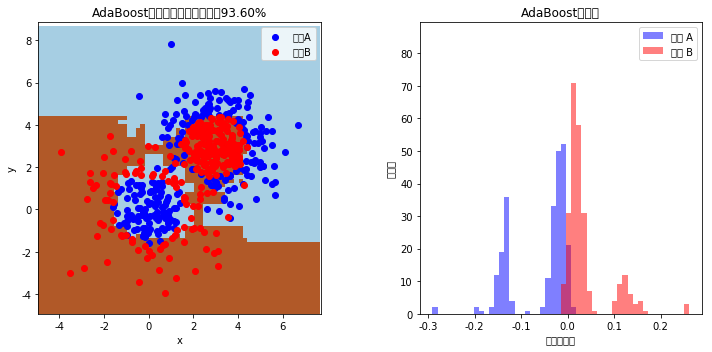

In [28]:
#设置颜色
plot_colors = 'br'
class_names = 'AB'

plt.figure(figsize=(10,5),facecolor='w')

# 绘制两个图
#第一个子图
plt.subplot(121)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#画点
for i,n,c in zip(range(2),class_names,plot_colors):
    idx = np.where(y==i)
    plt.scatter(X[idx,0],X[idx,1],
               c = c, cmap=plt.cm.Paired,label=u'类别%s' %n)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title(u'AdaBoost分类结果，正确率为：%.2f%%' % (bdt.score(X,y) * 100))

#获得阈值的决策函数数值
twoclass_output = bdt.decision_function(X)
#获取数值范围
plot_range = (twoclass_output.min(),twoclass_output.max())

#绘制第二个子图
plt.subplot(122)
for i,n,c in zip(range(2),class_names,plot_colors):
    #直方图
    plt.hist(twoclass_output[y==i],
            bins=50,
            range=plot_range,
            facecolor=c,
            label=u'类别 %s' % n,
            alpha=.5)
    
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2*1.2))
plt.legend(loc='upper right')
plt.ylabel(u'样本数')
plt.xlabel(u'决策值函数')
plt.title(u'AdaBoost决策值')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show